
## Project overview
Healthcare is vital for individuals and society, as it promotes well-being, prevents diseases,promoting health equity and many more.

This  project is crucial for creating healthier societies and fostering a culture of proactive health management.

## Business understanding
#### Problem statement
Develop a recommendetion system for exercise intensity that provides personalized recommendations on appropriate workout intensities based on individual characteristics, including age, gender, BMI, exercise duration, heart rate, calories burned, weather conditions, and desired weight goals. The goal is to guide individuals in selecting exercise intensities that optimize their fitness outcomes, taking into account their specific attributes and preferences.
#### Business Understanding
In today's thriving fitness and wellness industry, the development of a recommender system for exercise intensity presents valuable business opportunities. Fitness centers, gyms, and personal trainers can leverage this system to offer tailored workout programs that align with individual goals, preferences, and fitness levels, ultimately attracting and retaining members. Wellness apps and platforms can integrate the recommender system to deliver personalized exercise recommendations, enhancing the user experience and setting them apart from competitors. Healthcare providers can utilize the system to promote physical activity as a means of disease prevention and management, while corporate wellness programs can leverage it to support employee well-being and productivity. By incorporating an exercise intensity recommender system, businesses can optimize workout effectiveness, increase customer satisfaction, and differentiate their offerings in a competitive market.

#### Objectives
Overall Objective: Develop a Recommender System for Personalized Exercise Intensity

1. To personalize exercise intensity recommendations. Build a recommendation system based on individual characteristics such as age, gender, body mass index (BMI), exercise duration, heart rate, calories burned, weather conditions, and desired weight goals.
2. Develop a model that can predict the optimal exercise intensity for a given individual. 
3. Identify the factors that contribute to optimal exercise intensity.
4. To develop a recommender system that can dynamically adjust exercise intensity recommendations based on changing weather conditions. The system should consider the impact of different weather conditions on workout performance and suggest appropriate exercise intensities accordingly

## Data Understanding

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, Normalizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [281]:
df1 = pd.read_csv('exercise_datasett.csv')
df1

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45.0,Male,37.0,170.0,29.426275,Rainy,5.0
1,2,Exercise 7,343.453036,64.165097,61.104668,25.0,Male,43.0,142.0,21.286346,Rainy,5.0
2,3,Exercise 4,261.223465,70.846224,71.766724,20.0,Male,20.0,148.0,27.899592,Cloudy,4.0
3,4,Exercise 5,127.183858,79.477008,82.984456,33.0,Male,39.0,170.0,33.729552,Sunny,10.0
4,5,Exercise 10,416.318374,89.960226,85.643174,29.0,Female,34.0,118.0,23.286113,Cloudy,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100063,100064,Exercise 2,205.872575,80.355223,70.516820,22.0,Female,48.0,153.0,63.267795,Cloudy,3.0
100064,100065,Exercise 2,294.547811,98.703186,NaN,22.0,Male,53.0,148.0,51.359265,Cloudy,4.0
100065,100066,Exercise 2,258.779574,91.311974,84.096481,54.0,Male,35.0,166.0,61.164229,Cloudy,9.0
100066,100067,Exercise 3,269.916192,94.630249,85.552996,28.0,Male,55.0,NaN,39.910834,Rainy,5.0


In [282]:
df1.drop('ID',axis=1,inplace=True)
df1

,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,Exercise 2,286.959851,91.892531,96.301115,45.0,Male,37.0,170.0,29.426275,Rainy,5.0
1,Exercise 7,343.453036,64.165097,61.104668,25.0,Male,43.0,142.0,21.286346,Rainy,5.0
2,Exercise 4,261.223465,70.846224,71.766724,20.0,Male,20.0,148.0,27.899592,Cloudy,4.0
3,Exercise 5,127.183858,79.477008,82.984456,33.0,Male,39.0,170.0,33.729552,Sunny,10.0
4,Exercise 10,416.318374,89.960226,85.643174,29.0,Female,34.0,118.0,23.286113,Cloudy,3.0
...,...,...,...,...,...,...,...,...,...,...,...
100063,Exercise 2,205.872575,80.355223,70.516820,22.0,Female,48.0,153.0,63.267795,Cloudy,3.0
100064,Exercise 2,294.547811,98.703186,NaN,22.0,Male,53.0,148.0,51.359265,Cloudy,4.0
100065,Exercise 2,258.779574,91.311974,84.096481,54.0,Male,35.0,166.0,61.164229,Cloudy,9.0
100066,Exercise 3,269.916192,94.630249,85.552996,28.0,Male,55.0,NaN,39.910834,Rainy,5.0


In [283]:
#import pandas as pd
#from pandas_profiling import ProfileReport

# Load the dataset
#data = pd.read_csv('exercise_datasett.csv')

# Generate the profile report
#profile = ProfileReport(data)

# Save the report to an HTML file
#profile.to_file('report.html')


In [284]:
# A function to print the shape of our datasets
def print_dataset_shape(*datasets):
    """
    Prints the shape of one or more datasets (number of rows and columns).
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        print(f"Dataset {idx + 1} - Number of rows: {dataset.shape[0]}")
        print(f"Dataset {idx + 1} - Number of columns: {dataset.shape[1]}")
# print the shape of our dataset
print_dataset_shape(df1)

Dataset 1 - Number of rows: 100068
Dataset 1 - Number of columns: 11


In [285]:
# Function to display the head of our datasets
def display_data_head(df1):
    dfs = [df1.head()]
    df_names = ["data"]
    for df, name in zip(dfs, df_names): 
        print(f"\n{name}:\n")
        display(df)
# Display the head of our datasets
display_data_head(df1)


data:



,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,Exercise 2,286.959851,91.892531,96.301115,45.0,Male,37.0,170.0,29.426275,Rainy,5.0
1,Exercise 7,343.453036,64.165097,61.104668,25.0,Male,43.0,142.0,21.286346,Rainy,5.0
2,Exercise 4,261.223465,70.846224,71.766724,20.0,Male,20.0,148.0,27.899592,Cloudy,4.0
3,Exercise 5,127.183858,79.477008,82.984456,33.0,Male,39.0,170.0,33.729552,Sunny,10.0
4,Exercise 10,416.318374,89.960226,85.643174,29.0,Female,34.0,118.0,23.286113,Cloudy,3.0


In [286]:
#checking info of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100068 entries, 0 to 100067
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Exercise            100068 non-null  object 
 1   Calories Burn       90203 non-null   float64
 2   Dream Weight        90423 non-null   float64
 3   Actual Weight       90383 non-null   float64
 4   Age                 90428 non-null   float64
 5   Gender              90307 non-null   object 
 6   Duration            90595 non-null   float64
 7   Heart Rate          90375 non-null   float64
 8   BMI                 90631 non-null   float64
 9   Weather Conditions  90580 non-null   object 
 10  Exercise Intensity  90410 non-null   float64
dtypes: float64(8), object(3)
memory usage: 8.4+ MB


In [287]:
# A function to check for duplicates in our datasets
def check_duplicates(df):
    """
    This function checks for and returns any duplicates in a given dataframe.
    """
    duplicates = df[df.duplicated()]
    if duplicates.shape[0] == 0:
        print("No duplicates found in the dataset")
    else:
        print("Duplicates found in the dataset:")
        return duplicates
# Calling for the function to check for duplicates
check_duplicates(df1)

No duplicates found in the dataset


In [288]:
df1.columns

Index(['Exercise', 'Calories Burn', 'Dream Weight', 'Actual Weight', 'Age',
       'Gender', 'Duration', 'Heart Rate', 'BMI', 'Weather Conditions',
       'Exercise Intensity'],
      dtype='object')

### Missing Values

In [289]:
# A function to check for missing values in our dataset
def check_missing_values(data):
    # Count missing values in each column
    missing_values = data.isnull().sum()

    # Convert missing values count to percentage of total rows
    missing_percent = (missing_values / len(data)) * 100

    # Combine the missing values count and percent into a DataFrame
    missing_df = pd.concat([missing_values, missing_percent], axis=1)
    missing_df.columns = ['Missing Values', '% of Total']
# Return only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]

    return missing_df

# Check missing values in each dataset
display(check_missing_values(df1))

,Missing Values,% of Total
Calories Burn,9865,9.858296
Dream Weight,9645,9.638446
Actual Weight,9685,9.678419
Age,9640,9.633449
Gender,9761,9.754367
Duration,9473,9.466563
Heart Rate,9693,9.686413
BMI,9437,9.430587
Weather Conditions,9488,9.481553
Exercise Intensity,9658,9.651437


Calories Burn, Dream Weight, Actual Weight, Duration,Heart Rate,Age, BMI, contains missing values and we will fill them.

### Data Preparation

In [290]:
df1['Calories Burn'].ffill(inplace=True)
df1['Dream Weight'].bfill(inplace=True)
df1['Actual Weight'].ffill(inplace=True)
df1['Duration'].bfill(inplace=True)
df1['Heart Rate'].ffill(inplace=True)
df1['Age'].bfill(inplace=True)
df1['BMI'].ffill(inplace=True)

Gender and Weather condition will use foward fill respectively

In [291]:
df1['Gender'].ffill(inplace=True)
df1['Weather Conditions'].ffill(inplace=True)
df1['Exercise Intensity'].ffill(inplace=True)


In [292]:
# Check missing values in each dataset
display(check_missing_values(df1))

,Missing Values,% of Total


### Outliers

In [293]:
cols = ['Calories Burn', 'Dream Weight', 'Actual Weight', 'Age', 'Duration', 'Heart Rate', 'BMI', 'Exercise Intensity']

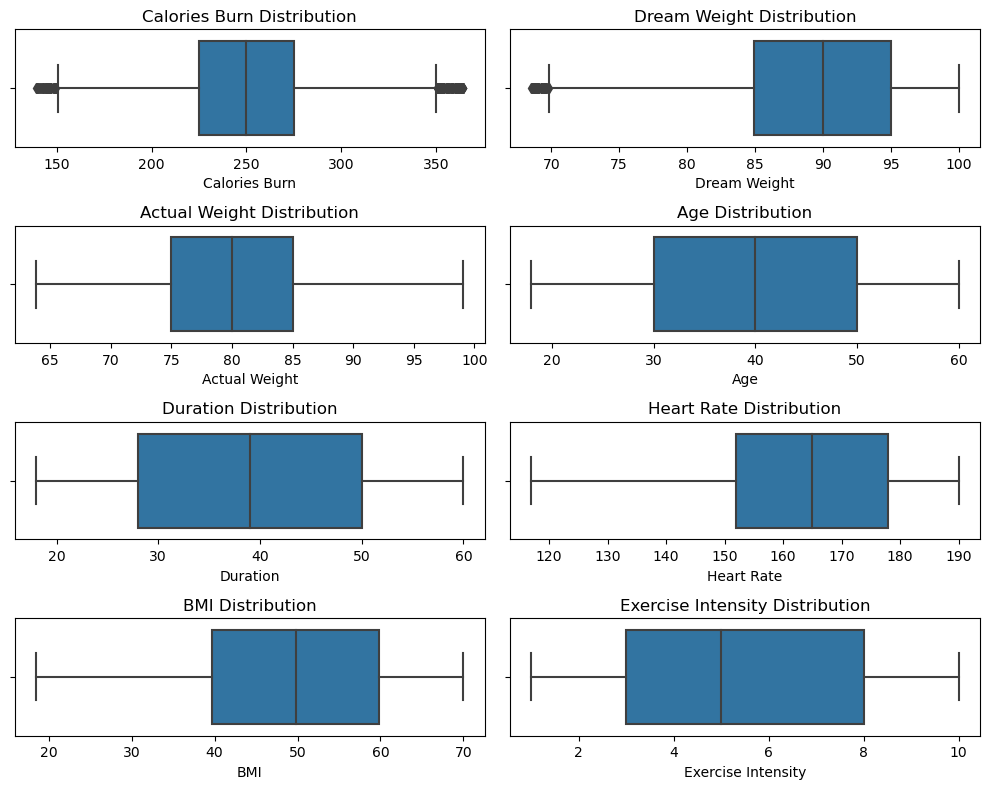

In [294]:
def remove_outliers(df, columns, threshold=3):
    
    df_cleaned = df.copy()  # Create a copy of the DataFrame
    
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()  # Calculate Z-scores
        outliers = df_cleaned.loc[abs(z_scores) > threshold]  # Find outliers based on threshold
        df_cleaned = df_cleaned.drop(outliers.index)  # Remove outliers from the DataFrame
    
    return df_cleaned


# Specify the columns to remove outliers from
columns_to_remove_outliers = cols

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df1, columns_to_remove_outliers)

# Plot box plots for the cleaned DataFrame
plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_to_remove_outliers):
    plt.subplot(len(columns_to_remove_outliers)//2 + len(columns_to_remove_outliers)%2, 2, i+1)
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()

### Feature Engineering

In [295]:
# check the unique variables for each category.
for col in df1.columns:
    print('\n' + col + '\n')
    print(df1[col].value_counts())


Exercise

Exercise 10    10127
Exercise 2     10105
Exercise 1     10070
Exercise 5     10048
Exercise 7     10009
Exercise 9      9993
Exercise 8      9991
Exercise 3      9927
Exercise 6      9921
Exercise 4      9877
Name: Exercise, dtype: int64

Calories Burn

237.542958    6
217.784733    5
214.131623    5
204.974168    5
265.465680    5
             ..
228.604435    1
297.014854    1
248.694817    1
272.475493    1
269.265321    1
Name: Calories Burn, Length: 90203, dtype: int64

Dream Weight

85.385625    7
92.403889    6
94.908972    5
86.068895    5
87.833227    5
            ..
95.467244    1
80.580730    1
80.729550    1
87.733271    1
87.741370    1
Name: Dream Weight, Length: 90423, dtype: int64

Actual Weight

87.189454    6
81.735644    6
84.374337    5
80.925622    5
85.600851    5
            ..
79.095936    1
83.156392    1
82.584261    1
89.203233    1
71.403662    1
Name: Actual Weight, Length: 90383, dtype: int64

Age

60.0    2531
35.0    2529
43.0    2528
58.0  

In [296]:
df2 = df1[['Age','Duration','BMI','Calories Burn']].copy()
df2

,Age,Duration,BMI,Calories Burn
0,45.0,37.0,29.426275,286.959851
1,25.0,43.0,21.286346,343.453036
2,20.0,20.0,27.899592,261.223465
3,33.0,39.0,33.729552,127.183858
4,29.0,34.0,23.286113,416.318374
...,...,...,...,...
100063,22.0,48.0,63.267795,205.872575
100064,22.0,53.0,51.359265,294.547811
100065,54.0,35.0,61.164229,258.779574
100066,28.0,55.0,39.910834,269.916192


In [297]:
# Function to map BMI values to weight categories
def BMI(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 24.9:
        return 'Normal weight'
    elif 24.9 <= BMI < 29.9:
        return 'Overweight'
    elif 29.9 <= BMI < 34.9:
        return 'Obesity class I'
    elif 34.9 <= BMI < 39.9:
        return 'Obesity class II'
    else:
        return 'Obesity class III'

# Apply the categorize_bmi function to the 'BMI' column to create a new column representing weight categories
df2['Weight Category'] = df2['BMI'].apply(BMI)


In [298]:
# Function to map Duration values to duration categories
def Duration(Duration):
    if 18 <= Duration <=26:
        return '19-26 minutes'
    elif 27 <= Duration <=34:
        return '27-34 minutes'
    elif 35 <= Duration <=42:
        return '35-42 minutes'
    elif 43 <= Duration <=50:
        return '43-50 minutes'
    elif 51 <= Duration <=58:
        return '51-58 minutes'
    elif Duration >= 58:
        return '58 minutes and above'

# Apply the Duration_Category function to the 'Duration' column to create a new column representing duration categories
df2['minute duration'] = df2['Duration'].apply(Duration)


In [299]:
# Function to map Duration values to duration categories
def Age(Age):
    if 18 <= Age<=25:
        return '18-25'
    elif 26 <= Age <=33:
        return '26-33'
    elif 34 <= Age <=41:
        return '34-41'
    elif 42 <= Age <=49:
        return '43-50'
    elif 50 <= Age <=57:
        return '50-57'
    elif Age >= 58:
        return 'Age 58 and above'

# Apply the Duration_Category function to the 'Duration' column to create a new column representing duration categories
df2['Age group'] = df2['Age'].apply(Age)


In [300]:
# Function to map Duration values to duration categories
def Calories_Burn(Calories_Burn):
    if 100<= Calories_Burn<=200.999999:
        return '100-200'
    elif 201 <= Calories_Burn<=300.999999:
        return '201-300'
    elif 301 <= Calories_Burn<=400.999999:
        return '301-400'
    elif 401 <= Calories_Burn<=500:
        return '401-500'        
    

# Apply the Duration_Category function to the 'Duration' column to create a new column representing duration categories
df2['Calories group'] = df2['Calories Burn'].apply(Calories_Burn)


In [301]:
# Check missing values in each dataset
display(check_missing_values(df2))

,Missing Values,% of Total


In [302]:
df2

,Age,Duration,BMI,Calories Burn,Weight Category,minute duration,Age group,Calories group
0,45.0,37.0,29.426275,286.959851,Overweight,35-42 minutes,43-50,201-300
1,25.0,43.0,21.286346,343.453036,Normal weight,43-50 minutes,18-25,301-400
2,20.0,20.0,27.899592,261.223465,Overweight,19-26 minutes,18-25,201-300
3,33.0,39.0,33.729552,127.183858,Obesity class I,35-42 minutes,26-33,100-200
4,29.0,34.0,23.286113,416.318374,Normal weight,27-34 minutes,26-33,401-500
...,...,...,...,...,...,...,...,...
100063,22.0,48.0,63.267795,205.872575,Obesity class III,43-50 minutes,18-25,201-300
100064,22.0,53.0,51.359265,294.547811,Obesity class III,51-58 minutes,18-25,201-300
100065,54.0,35.0,61.164229,258.779574,Obesity class III,35-42 minutes,50-57,201-300
100066,28.0,55.0,39.910834,269.916192,Obesity class III,51-58 minutes,26-33,201-300


In [303]:
df2.describe()

,Age,Duration,BMI,Calories Burn
count,100068.000000,100068.000000,100068.000000,100068.000000
mean,39.980183,39.046638,49.117572,251.881957
std,11.877258,12.375654,12.193786,37.658396
min,18.000000,18.000000,18.500014,100.009403
25%,30.000000,28.000000,38.874726,224.651004
50%,40.000000,39.000000,49.174550,250.349445
75%,50.000000,50.000000,59.602215,276.029311
max,60.000000,60.000000,69.998277,499.859262


### Exploratory Data Analysis

Create a class named EDA that encapsulates various methods for exploratory data analysis.

In [304]:
class EDA:
    def __init__(self, df1, df2):
        self.df1 = df1
        self.df2 = df2
    
    def plot_countplot(self, column, order=None):
        # specify figure dimensions
        plt.figure(figsize=(12, 8))
        # Create a countplot using seaborn's countplot function
        sns.countplot(y=column, order=order, data=self.df2)
        # Set the title of the plot
        plt.title(column + ' distribution')
        # Display the plot
        plt.show()
    
    def plot_scatter(self, x_column, y1_column, y2_column, color='green', marker='o', xlabel=None, ylabel=None, title=None):
        # Generate a scatter plot using matplotlib's scatter function
        plt.scatter(self.df1.groupby(by=x_column).mean().iloc[:, y1_column], self.df1.groupby(by=x_column).mean().iloc[:, y2_column], color=color, marker=marker)
        # Set the x-label if specified
        if xlabel:
            plt.xlabel(xlabel)
        # Set the y-label if specified
        if ylabel:
            plt.ylabel(ylabel)
        # Set the title if specified
        if title:
            plt.title(title)
        # Display the plot
        plt.show()
    
    def plot_bar(self, x_column, y_column, xlabel=None, ylabel=None, title=None, figsize=(10, 6), width=0.6):
        plt.figure(figsize=figsize)
        # Create a bar plot using matplotlib's bar function
        plt.bar(self.df2[x_column], self.df1[y_column], width=width)
        # Set the x-label if specified
        if xlabel:
            plt.xlabel(xlabel)
        # Set the y-label if specified
        if ylabel:
            plt.ylabel(ylabel)
        # Set the title if specified
        if title:
            plt.title(title)
        # Display the plot
        plt.show()




#### Age Distribution Analysis

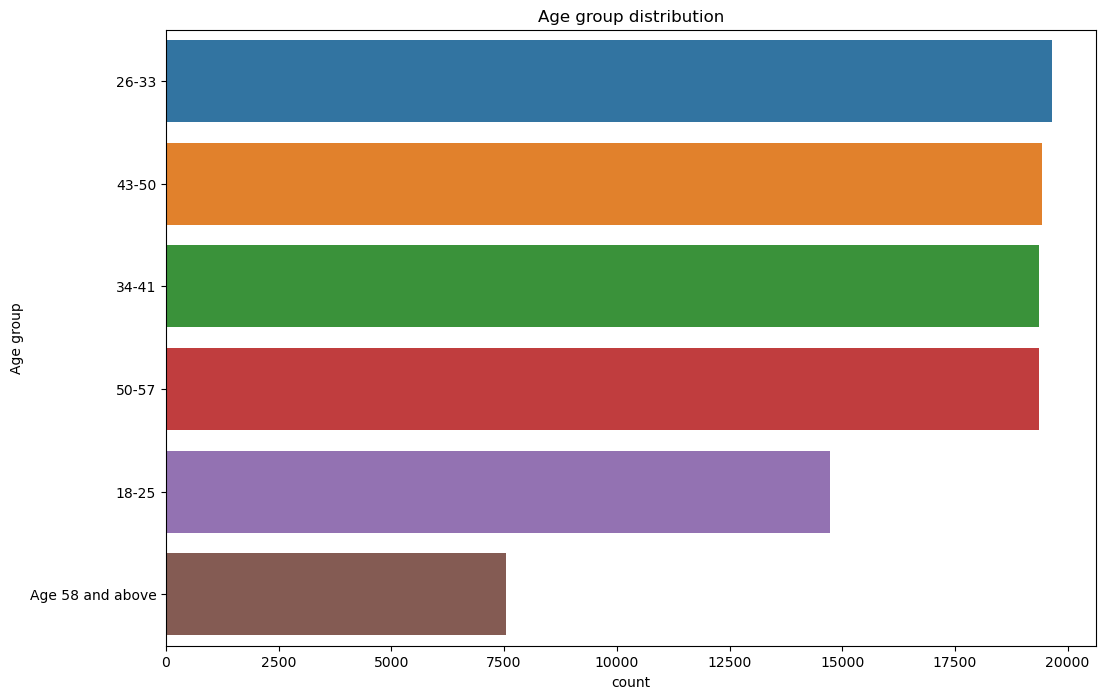

In [305]:
# Create an instance of the EDA class
eda = EDA(df1, df2)

# called plot_countplot method to Plot countplot for age distribution
eda.plot_countplot('Age group', order=df2['Age group'].value_counts().index[0:10])

Younger individuals exercise more due to higher energy levels, better physical capabilities, and prioritizing health and appearance. Societal trends and peer influence, flexible schedules, and the recognition of long-term health benefits contribute to their active participation in physical activities.

As we age, there are gradual changes that occur in our bodies, particularly in relation to our bones and muscles. Our bones begin to experience a gradual loss of calcium and other minerals, leading to decreased bone density. This makes our skeleton less resilient and more susceptible to fractures and injuries.
This contributes to a gradual decline in muscle mass and overall strength. As a result, the body becomes less robust and may experience difficulties in performing physical tasks that were once easier.

#### Duration distribution in minutes.

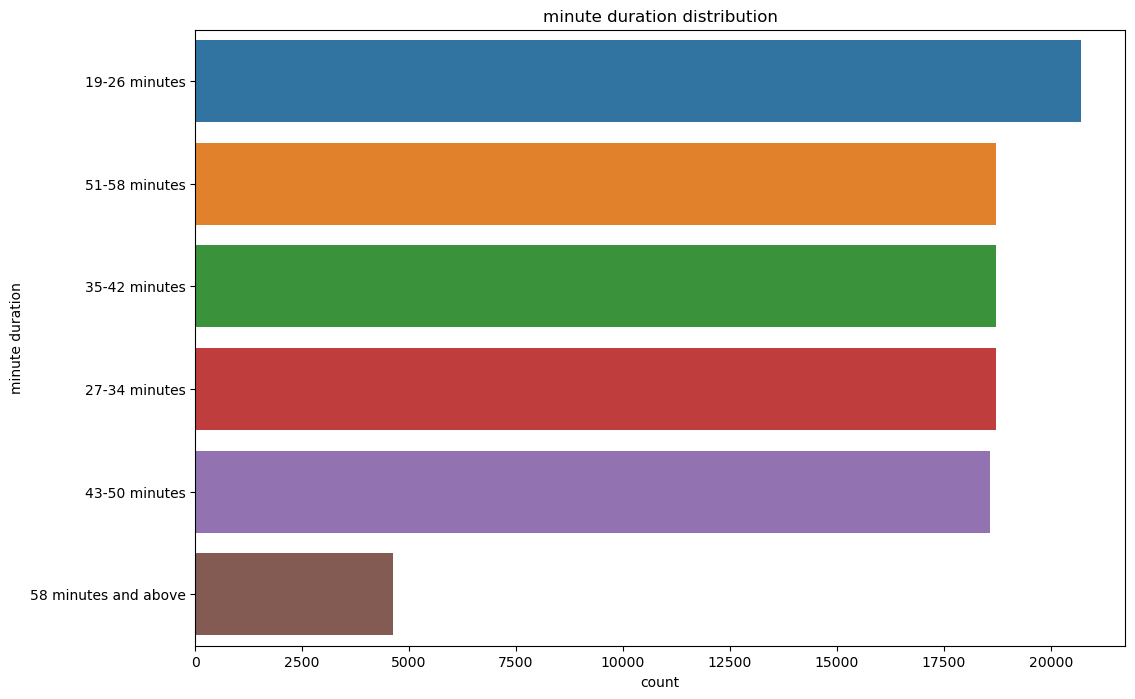

In [306]:

#  called plot_countplot method to Plot countplot for minute distribution
eda.plot_countplot('minute duration', order=df2['minute duration'].value_counts().index[0:10])


The most frequent duration was 19-50 minutes, the highest duration being 19-26 minutes with a mean of 35-42 minutes.


Distribution f weather conditions

In [307]:
df1['Weather Conditions'].value_counts()

Cloudy    33572
Rainy     33439
Sunny     33057
Name: Weather Conditions, dtype: int64

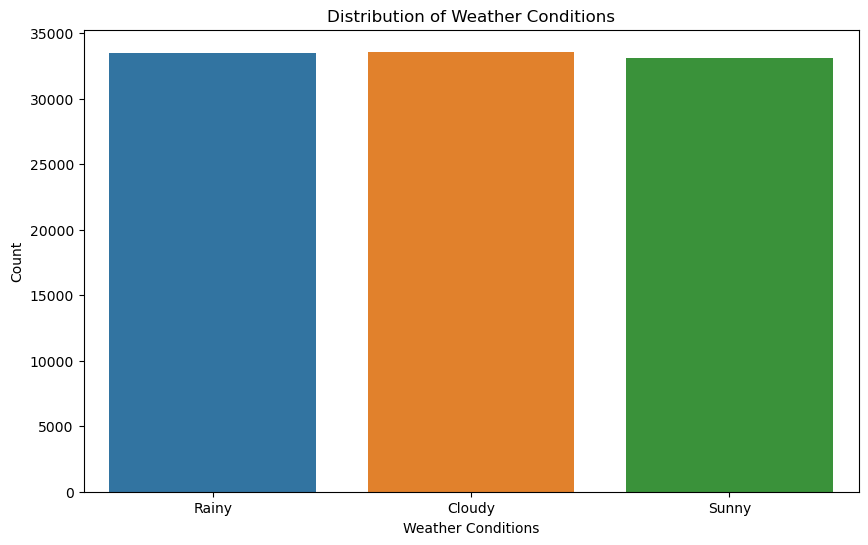

In [308]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather Conditions', data=df1)
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.title('Distribution of Weather Conditions')
plt.show()

The weather condition counts are almost equal.

#### Actual Weight and Dream Weight Analysis: Exploring Weight Goals and Aspirations

C:\Users\hp\AppData\Local\Temp\ipykernel_14964\4011648631.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df1.groupby(by='Age').mean().index,df1.groupby(by='Age').mean().iloc[:,1],label='Actual Weight')
C:\Users\hp\AppData\Local\Temp\ipykernel_14964\4011648631.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df1.groupby(by='Age').mean().index,df1.groupby(by='Age').mean().iloc[:,1],label='Actual Weight')
C:\Users\hp\AppData\Local\Temp\ipykernel_14964\4011648631.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_

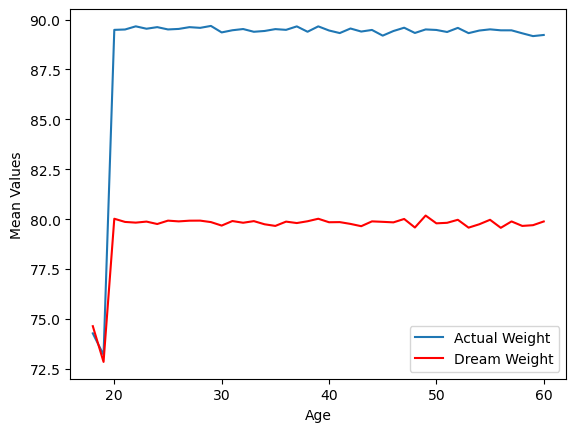

In [309]:
plt.plot(df1.groupby(by='Age').mean().index,df1.groupby(by='Age').mean().iloc[:,1],label='Actual Weight')
plt.plot(df1.groupby(by='Age').mean().index,df1.groupby(by='Age').mean().iloc[:,2],color='r',label='Dream Weight')
plt.xlabel('Age')
plt.ylabel('Mean Values')
plt.legend()
plt.show()

Trend in Actual Weight: The plot shows an increasing trend in actual weight as age group increases. On average, individuals tend to have higher actual weight as they get older.

Trend in Dream Weight: The plot indicates that dream weight values vary across age groups. There isn't a clear trend of increasing or decreasing dream weight with age.

Comparing Actual and Dream Weight: The plot reveals that, on average, individuals tend to have higher actual weight than their desired or dream weight across age groups.

C:\Users\hp\AppData\Local\Temp\ipykernel_14964\1278204113.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(self.df1.groupby(by=x_column).mean().iloc[:, y1_column], self.df1.groupby(by=x_column).mean().iloc[:, y2_column], color=color, marker=marker)
C:\Users\hp\AppData\Local\Temp\ipykernel_14964\1278204113.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(self.df1.groupby(by=x_column).mean().iloc[:, y1_column], self.df1.groupby(by=x_column).mean().iloc[:, y2_column], color=color, marker=marker)


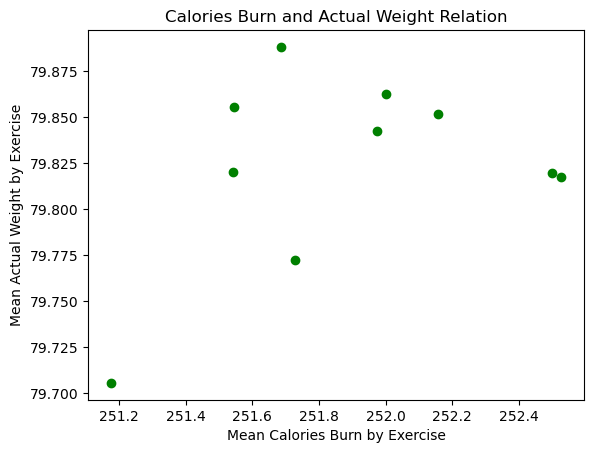

In [310]:
# called plot_scatter method to Plot scatter plot for calories burn and Actual Weight relation
eda.plot_scatter('Exercise', 0, 2, color='green', marker='o', xlabel='Mean Calories Burn by Exercise', ylabel='Mean Actual Weight by Exercise', title='Calories Burn and Actual Weight Relation')



There is a noticeable relationship between calories burned and actual weight based on exercise type. As the mean calories burned increase, there is a tendency for the mean actual weight to decrease. This suggests that exercises with higher calorie burn tend to be associated with lower mean actual weight.
The scatter plot shows a general negative trend between calories burned and actual weight, indicating that individuals who burn more calories during exercise tend to have lower mean actual weight.

Exploring the Relationship between Actual Weight and Age, with gender variation.

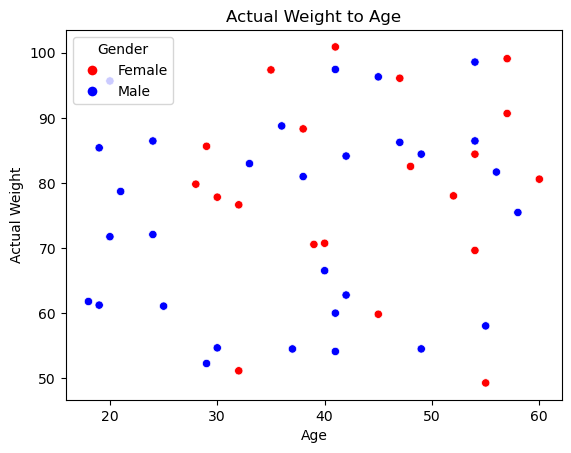

In [311]:
# Create a custom color palette for genders
gender_palette = {"Female": "red", "Male": "blue"}

# Create the scatter plot
ssp = sns.scatterplot(data=df1.head(50), x="Age", y="Actual Weight", hue="Gender", palette=gender_palette, style=None)

# Remove the exercise markings
ssp.get_legend().remove()

# Add a custom legend for genders
legend_handles = [plt.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=8) for color in gender_palette.values()]
plt.legend(legend_handles, gender_palette.keys(), title='Gender', loc='upper left')

# Set the title
plt.title("Actual Weight to Age")

# Show the plot
plt.show()

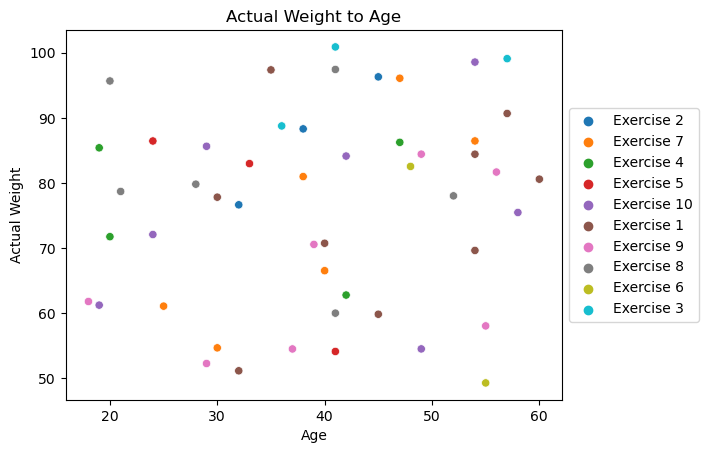

In [312]:
# Create the scatter plot
ssp = sns.scatterplot(data=df1.head(50), x="Age", y="Actual Weight", hue="Exercise")

# Remove the legend title
ssp.get_legend().set_title('')

# Set the title
plt.title("Actual Weight to Age")

# Move the legend outside the plot
ssp.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

We can observe a general trend where as age increases, there is a tendency for actual weight to increase as well. This is evident by the overall upward trend of the data points.
There is no clear association between exercise type and actual weight based on the scatter plot.

How does weather condition affect Exercise Intensity?

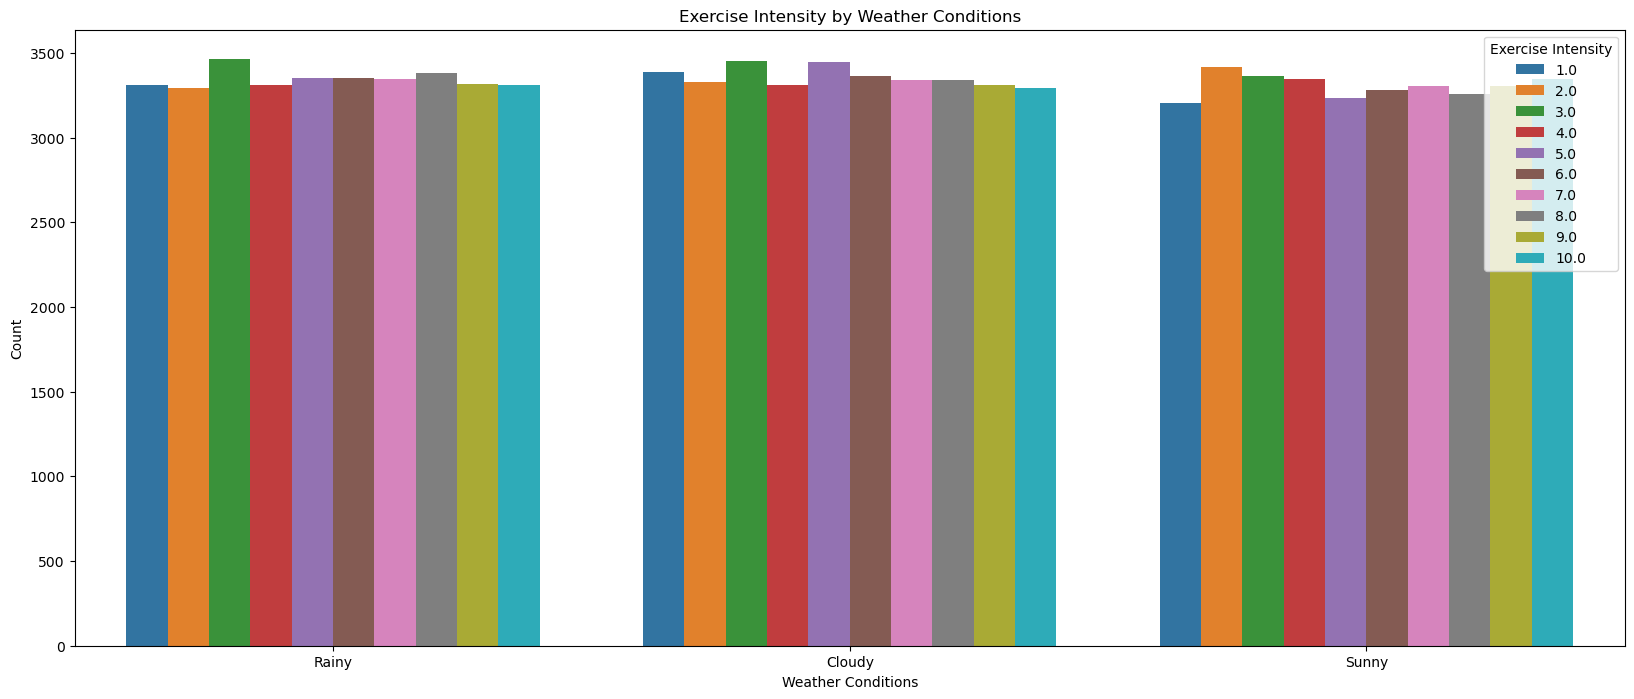

In [313]:
# Create a bar plot of exercise intensity by weather conditions
plt.figure(figsize=(20, 8))
sns.countplot(x='Weather Conditions', hue='Exercise Intensity', data=df1)
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.title('Exercise Intensity by Weather Conditions')
plt.legend(title='Exercise Intensity')
plt.show()

Sunny Weather Conditions:

Moderate Intensity: The most common exercise intensity level during sunny weather is moderate.
Low Intensity: There are fewer exercise sessions at a low intensity during sunny weather compared to moderate intensity.

Rainy Weather Conditions:
Low Intensity: The count of low-intensity exercises is higher during rainy weather.
High Intensity: There are fewer high-intensity exercises during rainy weather.

Cloudy Weather Conditions:

Moderate Intensity: The majority of exercise sessions during cloudy weather are at a moderate intensity level.
Low and High Intensity: The count of low and high-intensity exercises during cloudy weather may vary.
Overall Observations:

Different Weather, Different Intensities: Each weather condition shows a different distribution of exercise intensity levels.
Weather Influence: Weather conditions may influence exercise intensity preferences and choices.

* Comparison of Mean Dream Weight and Actual Weight Across Age Groups

C:\Users\hp\AppData\Local\Temp\ipykernel_14964\3294183942.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df1.groupby(by='Age').mean().index, df1.groupby(by='Age').mean().iloc[:,1], label='Dream Weight')
C:\Users\hp\AppData\Local\Temp\ipykernel_14964\3294183942.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df1.groupby(by='Age').mean().index, df1.groupby(by='Age').mean().iloc[:,1], label='Dream Weight')
C:\Users\hp\AppData\Local\Temp\ipykernel_14964\3294183942.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_

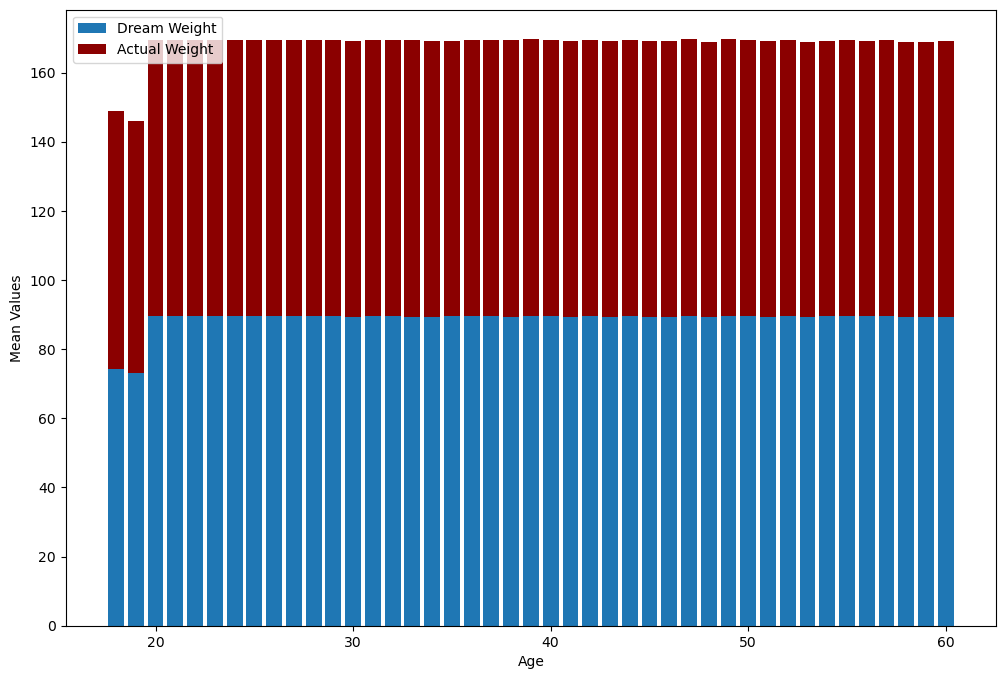

In [314]:
plt.figure(figsize=(12, 8))  # Set the figure size to 12 inches (width) by 8 inches (height)
plt.bar(df1.groupby(by='Age').mean().index, df1.groupby(by='Age').mean().iloc[:,1], label='Dream Weight')
plt.bar(df1.groupby(by='Age').mean().index, df1.groupby(by='Age').mean().iloc[:,2], color='darkred', label='Actual Weight', bottom=df1.groupby(by='Age').mean().iloc[:,1])
plt.xlabel('Age')
plt.ylabel('Mean Values')
plt.legend()
plt.show()

Across all age groups, the graph illustrates that the mean actual weight exceeds the mean dream weight. This suggests that individuals in the dataset, regardless of their age, generally have higher actual weights compared to their desired or ideal weights.

Is there a relationship or association between age group and exercise intensity?

In [315]:
# Create a contingency table for Age Group and Exercise Intensity
contingency_table = pd.crosstab(df2['Age group'], df1['Exercise Intensity'])

# Print the contingency table
contingency_table

Exercise Intensity,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Age group,,,,,,,,,,
18-25,1460,1478,1530,1420,1485,1482,1459,1453,1425,1534
26-33,1924,1898,2021,2000,2023,1938,1942,1941,1977,1984
34-41,1941,1959,1995,1905,1916,1929,1986,1914,1877,1953
43-50,1853,1983,1943,2019,1927,1937,1915,1995,1956,1893
50-57,1951,1949,2021,1907,1963,1932,1931,1939,1944,1826
Age 58 and above,772,771,766,714,715,779,755,745,757,761


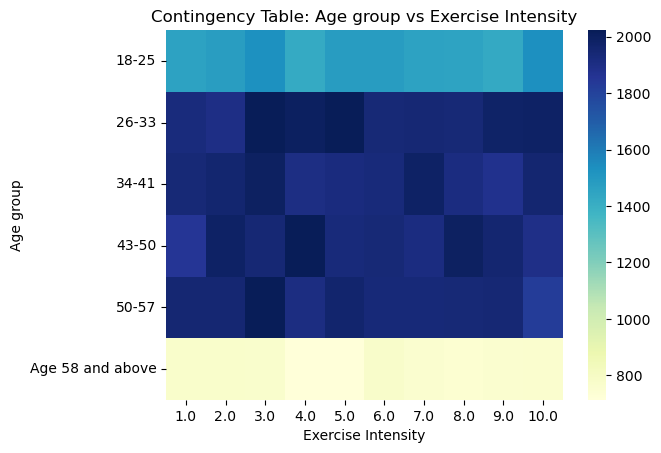

In [316]:
# Create a heatmap of the contingency table with colors
sns.heatmap(contingency_table, cmap='YlGnBu')

# Add labels and title
plt.xlabel('Exercise Intensity')
plt.ylabel('Age group')
plt.title('Contingency Table: Age group vs Exercise Intensity')

# Show the plot
plt.show()

* There is a higher concentration of individuals in the age group "18-25" with exercise intensity levels 1.0, 2.0, and 3.0.
* The age group "26-33" shows a relatively even distribution across various exercise intensity levels.
* The age groups "34-41" and "43-50" have a higher count of individuals with exercise intensity levels 1.0 and 2.0.
* The age groups "50-57" and "58 and above" tend to have lower counts across all exercise intensity levels, indicating a  potentially lower participation in higher intensity exercises

What is the distribution of heart rate base on different Age group?

In [317]:
# plt.figure(figsize=(10, 6))  # Increase the figure size
# plt.bar(df1['Age'], df1['Heart Rate'], width=0.6)  # Adjust the width of the bars
# plt.xlabel('Age group')
# plt.ylabel('Heart Rate')
# plt.title('Age - Heart Rate Relation')
# plt.show()

In [318]:
# called plot_bar method to Plot bar plot for age and heart rate relation
# eda.plot_bar('Age group', 'Heart Rate', xlabel='Age group', ylabel='Heart Rate', title='Age - Heart Rate Relation')

In [319]:

# called plot_bar method to Plot bar plot for minute duration and calories burned
# eda.plot_bar('minute duration', 'Calories Burn', xlabel='minute duration', ylabel='calories burn', title='minute duration vs calories burned')


In [320]:
# called plot_bar method to Plot bar plot for weight category and age
# eda.plot_bar('Weight Category', 'Age', xlabel='Weight Category', ylabel='Age', title='weight category vs age')

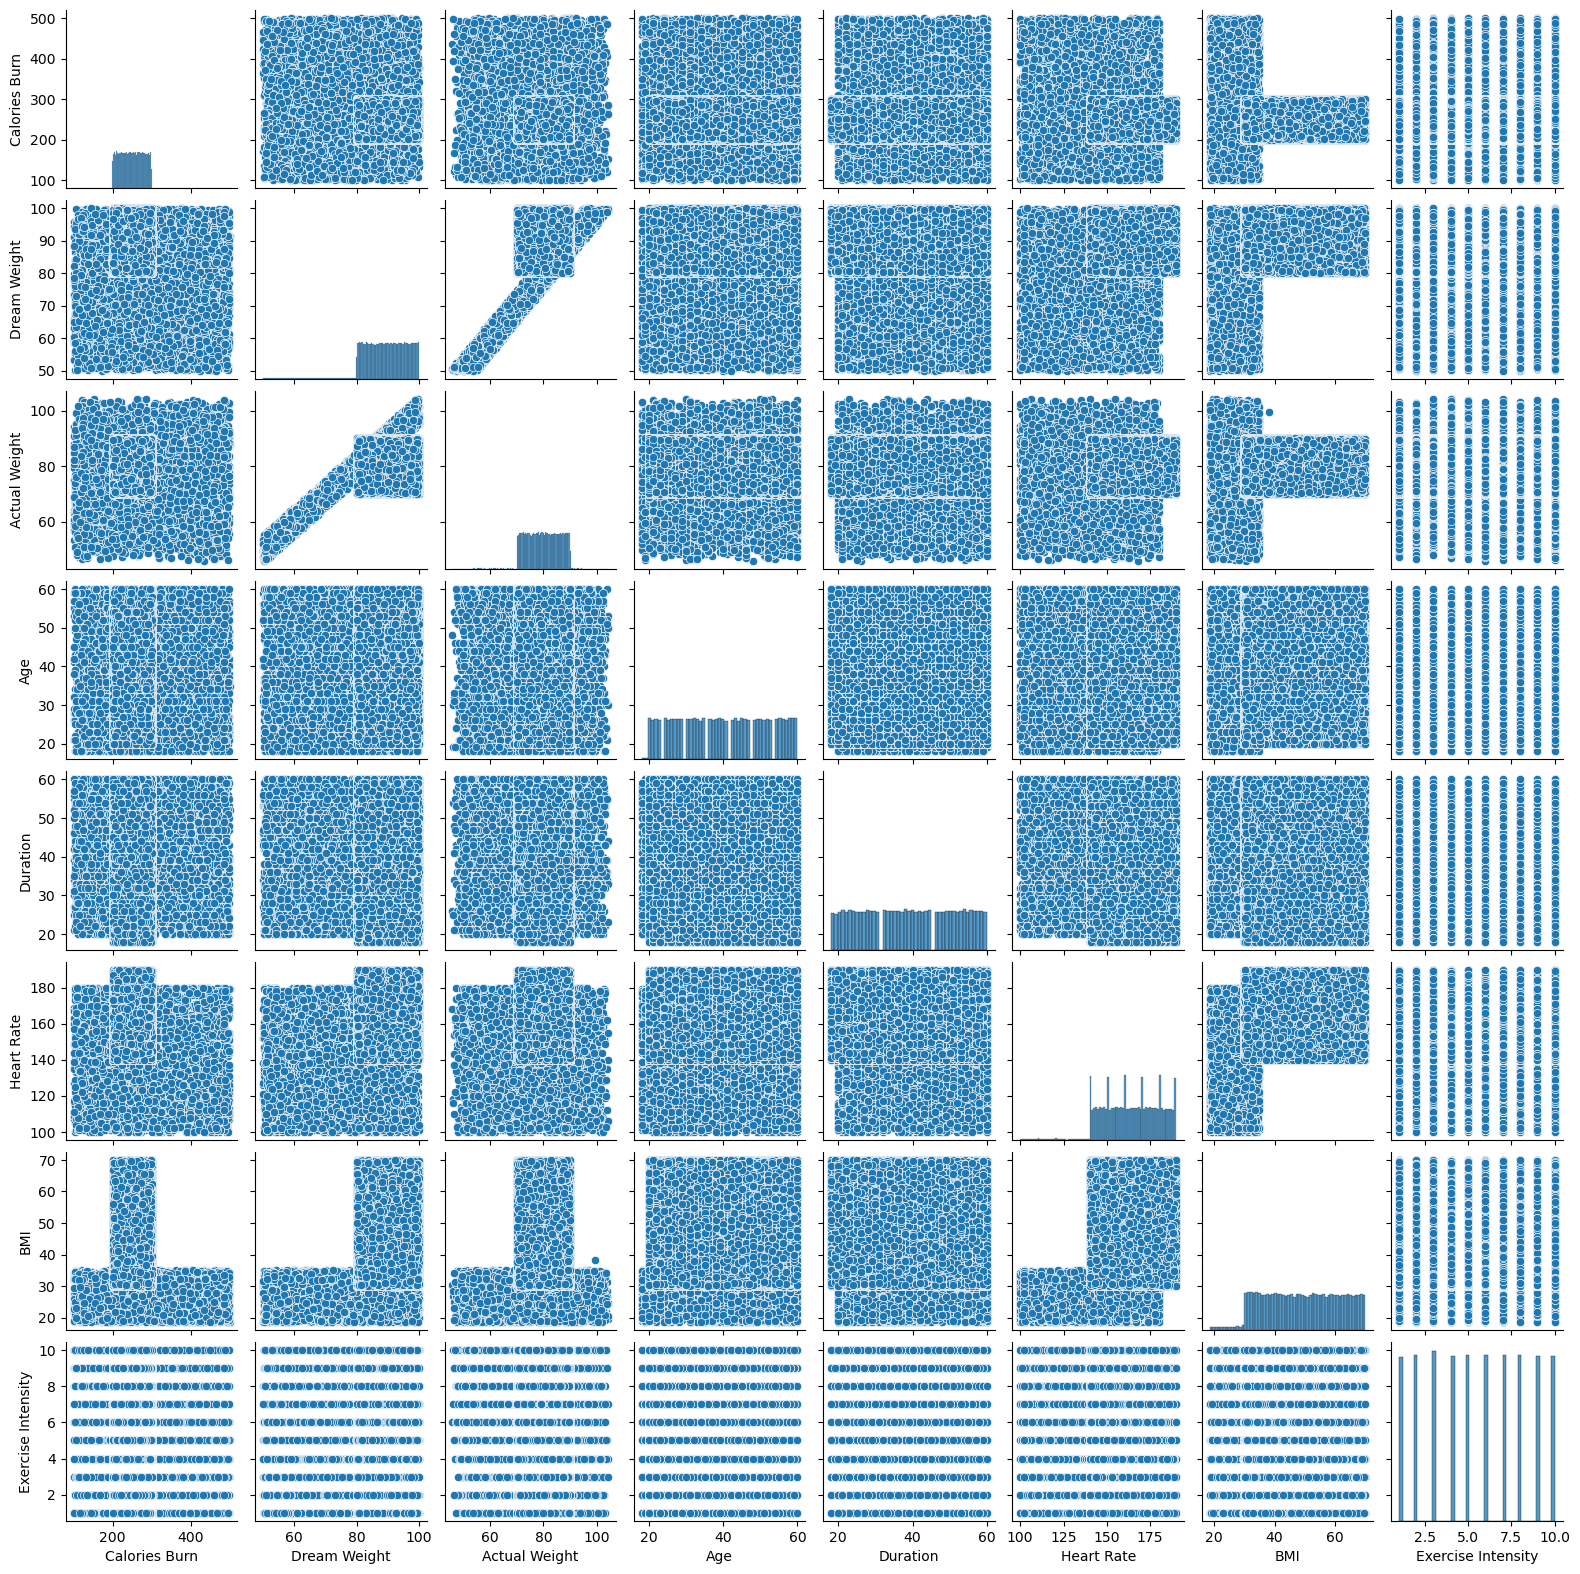

In [321]:
sns.pairplot(data = df1, height = 2); 

There appears to be a positive linear relationship between "Calories Burn" and "Actual Weight", suggesting that individuals with higher actual weights tend to burn more calories during exercise.

The scatter plot between "Calories Burn" and "Duration" indicates that longer exercise durations generally result in higher calorie burn.

The histograms reveal that the variables "Calories Burn", "Actual Weight", and "Duration" are positively skewed, with most of the data concentrated towards the lower end.

The scatter plot between "Heart Rate" and "Exercise Intensity" shows that higher exercise intensity is associated with higher heart rates.

The histogram for "Exercise Intensity" indicates that the majority of the data points fall into the lower intensity levels (around 1.0 to 3.0).

The scatter plots between "Age" and other variables do not exhibit clear patterns or strong correlations.

The histograms for "Age" and "BMI" suggest relatively normal distributions with slight variations.

C:\Users\hp\AppData\Local\Temp\ipykernel_14964\2671608369.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

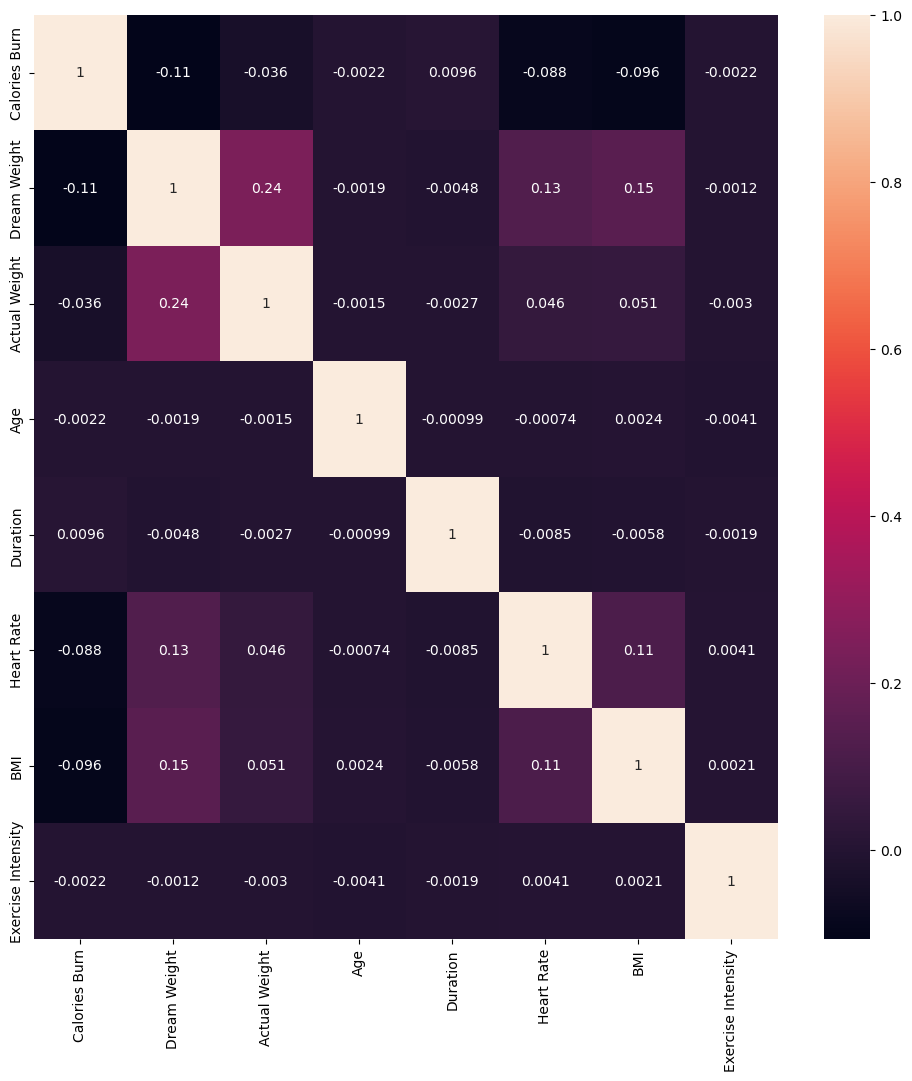

In [322]:
#heatmap of the correlation matrix 
plt.subplots(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True)

The darker the shade of blue, the stronger the positive correlation between the two variables, while the darker the shade of red, the stronger the negative correlation between the two variables. A value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no correlation between the two variables.

* Calories Burn and BMI: The correlation coefficient is -0.096, indicating a negative correlation, suggesting that higher BMI values are associated with lower calorie burn.

* Calories Burn and Actual Weight: The correlation coefficient is -0.11, indicating a negative correlation. This suggests that as actual weight increases, the calories burned tend to decrease.

* Calories Burn and Duration: The correlation coefficient is 0.0096, indicating a weak positive correlation. This implies that there is a slight tendency for longer durations of exercise to result in higher calories burned.

* Calories Burn and Heart Rate: The correlation coefficient is -0.088, indicating a negative correlation. This suggests that as heart rate increases, the calories burned tend to decrease.

* Calories Burn and Exercise Intensity: The correlation coefficient is -0.0022, indicating a very weak negative correlation. This suggests that exercise intensity has a minimal effect on calories burned.

* Actual Weight and BMI: The correlation coefficient is 0.15, indicating a positive correlation. This suggests that higher actual weight is associated with higher BMI values.

* Actual Weight and Dream Weight: The correlation coefficient is 0.24, indicating a positive correlation. This suggests that there is a relationship between actual weight and desired/dream weight.

* BMI and Duration: The correlation coefficient is -0.0048, indicating a very weak negative correlation. This suggests that there is a minimal relationship between BMI and exercise duration.

* BMI and Heart Rate: The correlation coefficient is 0.13, indicating a positive correlation. This suggests that higher BMI values are associated with higher heart rates.

* Duration and Heart Rate: The correlation coefficient is -0.0085, indicating a very weak negative correlation. This suggests that there is a minimal relationship between exercise duration and heart rate.

In [323]:
import pandas as pd

# Concatenate df1 and the selected columns from df2 horizontally
df3= pd.concat([df1, df2], axis=1)

# Fill NaN values with appropriate values if needed
#df1.fillna({'Weather Conditions': 'Unknown', 'Calories Group': 'Unknown', 'Age group': 'Unknown', 'Weight Category': 'Unknown'}, inplace=True)
df3

,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity,Age,Duration,BMI,Calories Burn,Weight Category,minute duration,Age group,Calories group
0,Exercise 2,286.959851,91.892531,96.301115,45.0,Male,37.0,170.0,29.426275,Rainy,5.0,45.0,37.0,29.426275,286.959851,Overweight,35-42 minutes,43-50,201-300
1,Exercise 7,343.453036,64.165097,61.104668,25.0,Male,43.0,142.0,21.286346,Rainy,5.0,25.0,43.0,21.286346,343.453036,Normal weight,43-50 minutes,18-25,301-400
2,Exercise 4,261.223465,70.846224,71.766724,20.0,Male,20.0,148.0,27.899592,Cloudy,4.0,20.0,20.0,27.899592,261.223465,Overweight,19-26 minutes,18-25,201-300
3,Exercise 5,127.183858,79.477008,82.984456,33.0,Male,39.0,170.0,33.729552,Sunny,10.0,33.0,39.0,33.729552,127.183858,Obesity class I,35-42 minutes,26-33,100-200
4,Exercise 10,416.318374,89.960226,85.643174,29.0,Female,34.0,118.0,23.286113,Cloudy,3.0,29.0,34.0,23.286113,416.318374,Normal weight,27-34 minutes,26-33,401-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100063,Exercise 2,205.872575,80.355223,70.516820,22.0,Female,48.0,153.0,63.267795,Cloudy,3.0,22.0,48.0,63.267795,205.872575,Obesity class III,43-50 minutes,18-25,201-300
100064,Exercise 2,294.547811,98.703186,70.516820,22.0,Male,53.0,148.0,51.359265,Cloudy,4.0,22.0,53.0,51.359265,294.547811,Obesity class III,51-58 minutes,18-25,201-300
100065,Exercise 2,258.779574,91.311974,84.096481,54.0,Male,35.0,166.0,61.164229,Cloudy,9.0,54.0,35.0,61.164229,258.779574,Obesity class III,35-42 minutes,50-57,201-300
100066,Exercise 3,269.916192,94.630249,85.552996,28.0,Male,55.0,166.0,39.910834,Rainy,5.0,28.0,55.0,39.910834,269.916192,Obesity class III,51-58 minutes,26-33,201-300


In [324]:
df3.drop(['Age', 'Calories Burn', 'BMI', 'Duration'], axis=1)


,Exercise,Dream Weight,Actual Weight,Gender,Heart Rate,Weather Conditions,Exercise Intensity,Weight Category,minute duration,Age group,Calories group
0,Exercise 2,91.892531,96.301115,Male,170.0,Rainy,5.0,Overweight,35-42 minutes,43-50,201-300
1,Exercise 7,64.165097,61.104668,Male,142.0,Rainy,5.0,Normal weight,43-50 minutes,18-25,301-400
2,Exercise 4,70.846224,71.766724,Male,148.0,Cloudy,4.0,Overweight,19-26 minutes,18-25,201-300
3,Exercise 5,79.477008,82.984456,Male,170.0,Sunny,10.0,Obesity class I,35-42 minutes,26-33,100-200
4,Exercise 10,89.960226,85.643174,Female,118.0,Cloudy,3.0,Normal weight,27-34 minutes,26-33,401-500
...,...,...,...,...,...,...,...,...,...,...,...
100063,Exercise 2,80.355223,70.516820,Female,153.0,Cloudy,3.0,Obesity class III,43-50 minutes,18-25,201-300
100064,Exercise 2,98.703186,70.516820,Male,148.0,Cloudy,4.0,Obesity class III,51-58 minutes,18-25,201-300
100065,Exercise 2,91.311974,84.096481,Male,166.0,Cloudy,9.0,Obesity class III,35-42 minutes,50-57,201-300
100066,Exercise 3,94.630249,85.552996,Male,166.0,Rainy,5.0,Obesity class III,51-58 minutes,26-33,201-300


In [325]:
display(check_missing_values(df3))

,Missing Values,% of Total


In [326]:
df4 = pd.get_dummies(df3,columns={'Gender','Weather Conditions','Exercise', 'Weight Category','minute duration', 'Age group', 'Calories group'},drop_first=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14964\1422142118.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df4 = pd.get_dummies(df3,columns={'Gender','Weather Conditions','Exercise', 'Weight Category','minute duration', 'Age group', 'Calories group'},drop_first=True)


In [327]:
df4


,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity,Age,Duration,...,Weight Category_Obesity class I,Weight Category_Obesity class II,Weight Category_Obesity class III,Weight Category_Overweight,minute duration_27-34 minutes,minute duration_35-42 minutes,minute duration_43-50 minutes,minute duration_51-58 minutes,minute duration_58 minutes and above,Gender_Male
0,286.959851,91.892531,96.301115,45.0,37.0,170.0,29.426275,5.0,45.0,37.0,...,0,0,0,1,0,1,0,0,0,1
1,343.453036,64.165097,61.104668,25.0,43.0,142.0,21.286346,5.0,25.0,43.0,...,0,0,0,0,0,0,1,0,0,1
2,261.223465,70.846224,71.766724,20.0,20.0,148.0,27.899592,4.0,20.0,20.0,...,0,0,0,1,0,0,0,0,0,1
3,127.183858,79.477008,82.984456,33.0,39.0,170.0,33.729552,10.0,33.0,39.0,...,1,0,0,0,0,1,0,0,0,1
4,416.318374,89.960226,85.643174,29.0,34.0,118.0,23.286113,3.0,29.0,34.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100063,205.872575,80.355223,70.516820,22.0,48.0,153.0,63.267795,3.0,22.0,48.0,...,0,0,1,0,0,0,1,0,0,0
100064,294.547811,98.703186,70.516820,22.0,53.0,148.0,51.359265,4.0,22.0,53.0,...,0,0,1,0,0,0,0,1,0,1
100065,258.779574,91.311974,84.096481,54.0,35.0,166.0,61.164229,9.0,54.0,35.0,...,0,0,1,0,0,1,0,0,0,1
100066,269.916192,94.630249,85.552996,28.0,55.0,166.0,39.910834,5.0,28.0,55.0,...,0,0,1,0,0,0,0,1,0,1


In [328]:
display(check_missing_values(df4))

,Missing Values,% of Total


In [329]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100068 entries, 0 to 100067
Data columns (total 41 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Calories Burn                         100068 non-null  float64
 1   Dream Weight                          100068 non-null  float64
 2   Actual Weight                         100068 non-null  float64
 3   Age                                   100068 non-null  float64
 4   Duration                              100068 non-null  float64
 5   Heart Rate                            100068 non-null  float64
 6   BMI                                   100068 non-null  float64
 7   Exercise Intensity                    100068 non-null  float64
 8   Age                                   100068 non-null  float64
 9   Duration                              100068 non-null  float64
 10  BMI                                   100068 non-null  float64
 11  

## Modeling
